> #  Time series forecasting and portfolio optimization

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

tsla = yf.download('TSLA', start='2015-01-01', end='2024-10-31')
bnd = yf.download('BND', start='2015-01-01', end='2024-10-31')
spy = yf.download('SPY', start='2015-01-01', end='2024-10-31')

all_data = {
    'tesla':tsla,
    'bond':bnd,
    'spy':spy
}

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


>>> ### Correct date format

In [2]:
from scripts.date_correction import *
for keys,data in all_data.items():
    data = format_date(data) 

In [3]:
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500


>>> ### Check missing values

In [4]:
for items,keys in all_data.items():
    print(f'{items} missing values\n{keys.isna().sum()}\n')

tesla missing values
Price      Ticker
Adj Close  TSLA      0
Close      TSLA      0
High       TSLA      0
Low        TSLA      0
Open       TSLA      0
Volume     TSLA      0
dtype: int64

bond missing values
Price      Ticker
Adj Close  BND       0
Close      BND       0
High       BND       0
Low        BND       0
Open       BND       0
Volume     BND       0
dtype: int64

spy missing values
Price      Ticker
Adj Close  SPY       0
Close      SPY       0
High       SPY       0
Low        SPY       0
Open       SPY       0
Volume     SPY       0
dtype: int64



>>> ### Check Data Types

In [5]:
for items,keys in all_data.items():
    print(keys.dtypes)

Price      Ticker
Adj Close  TSLA      float64
Close      TSLA      float64
High       TSLA      float64
Low        TSLA      float64
Open       TSLA      float64
Volume     TSLA        int64
dtype: object
Price      Ticker
Adj Close  BND       float64
Close      BND       float64
High       BND       float64
Low        BND       float64
Open       BND       float64
Volume     BND         int64
dtype: object
Price      Ticker
Adj Close  SPY       float64
Close      SPY       float64
High       SPY       float64
Low        SPY       float64
Open       SPY       float64
Volume     SPY         int64
dtype: object


>> ## Adjusted Close Prices

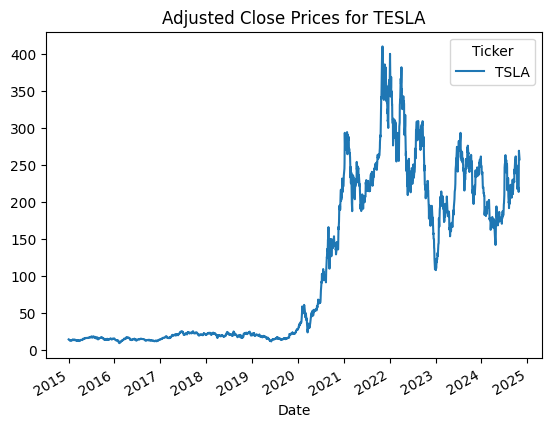

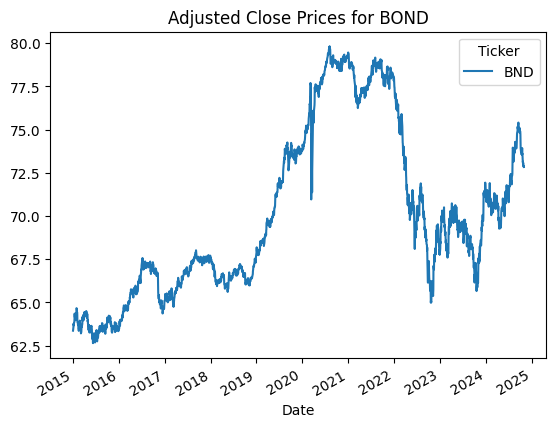

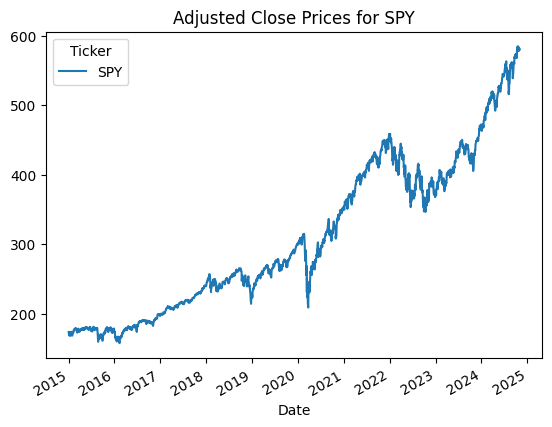

In [6]:
for asset, data in all_data.items():
    data['Adj Close'].plot(title=f"Adjusted Close Prices for {asset.upper()}")
    plt.show()

>> ## Daily Returns

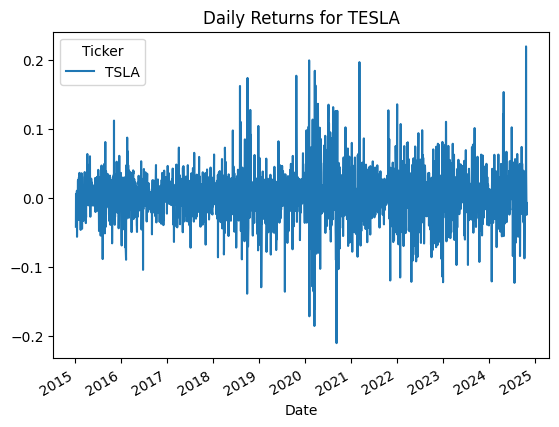

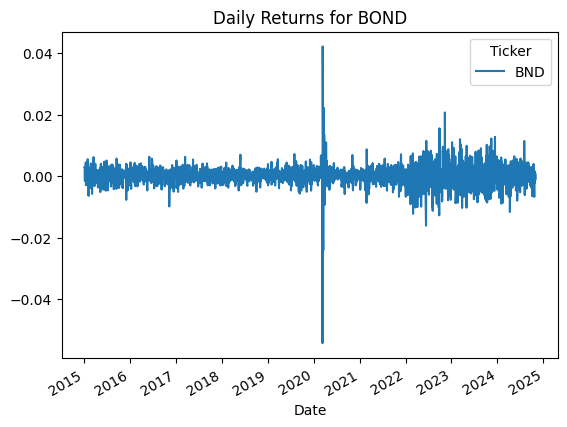

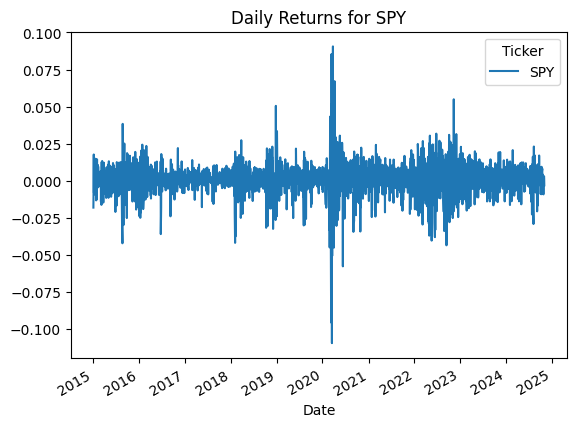

In [7]:
# Plot Daily Returns for all assets
for asset, data in all_data.items():
    returns = data['Adj Close'].pct_change().dropna()
    returns.plot(title=f"Daily Returns for {asset.upper()}")
    plt.show()

>> ## Volatility with shaded volatility range

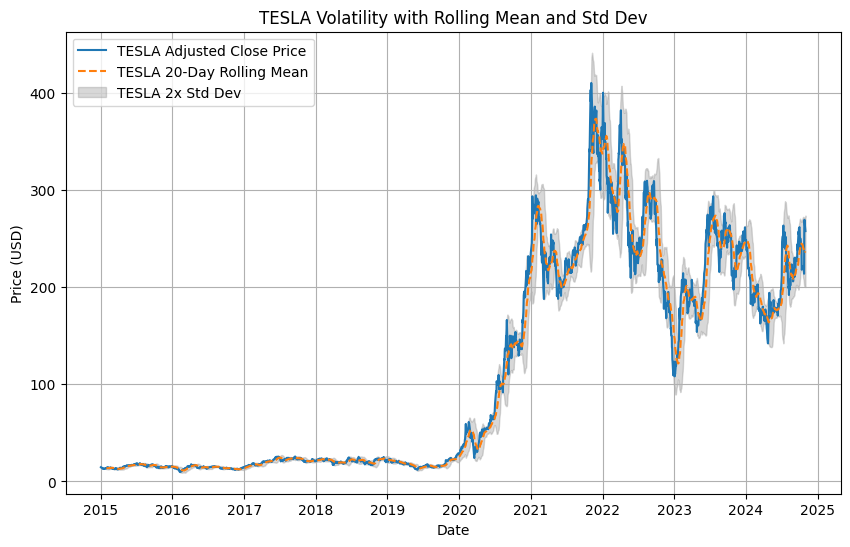

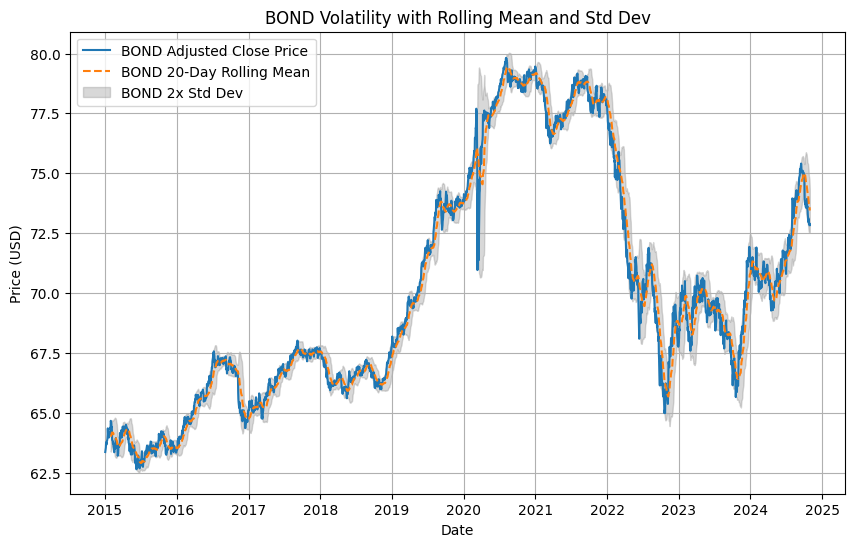

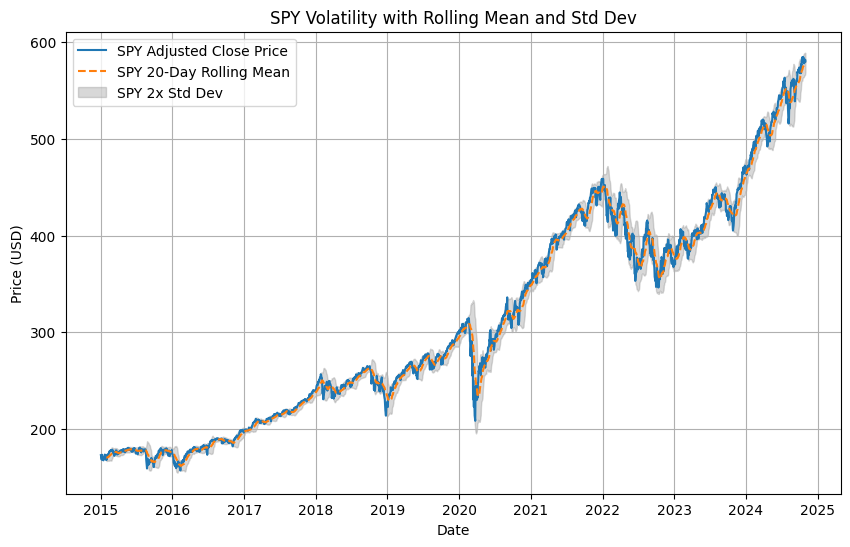

In [8]:
from scripts.visualizations import *
volatility(all_data)

>> ## Outliers

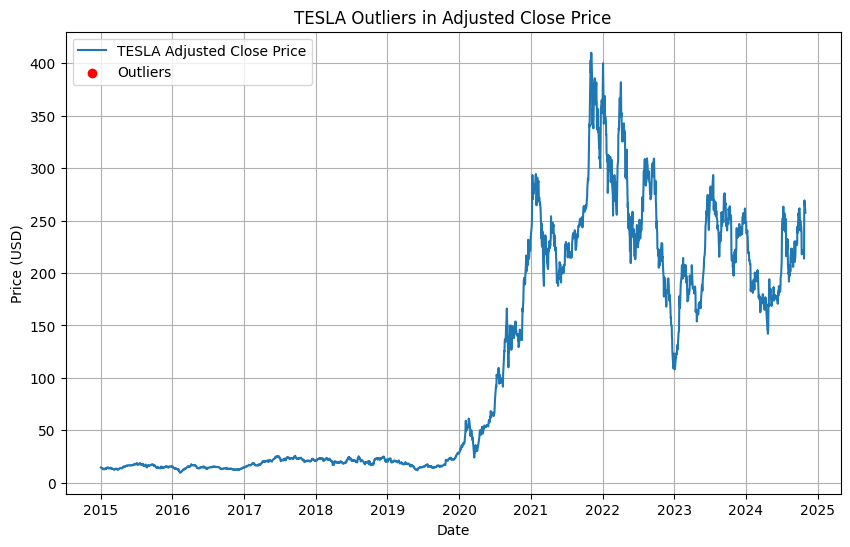

Outliers for TESLA:
Empty DataFrame
Columns: [(Adj Close, TSLA), (Z-Score, )]
Index: []




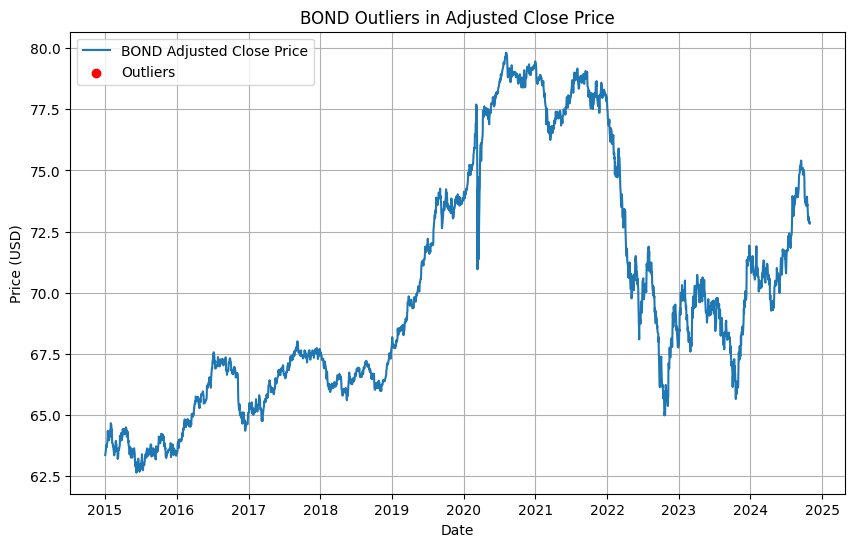

Outliers for BOND:
Empty DataFrame
Columns: [(Adj Close, BND), (Z-Score, )]
Index: []




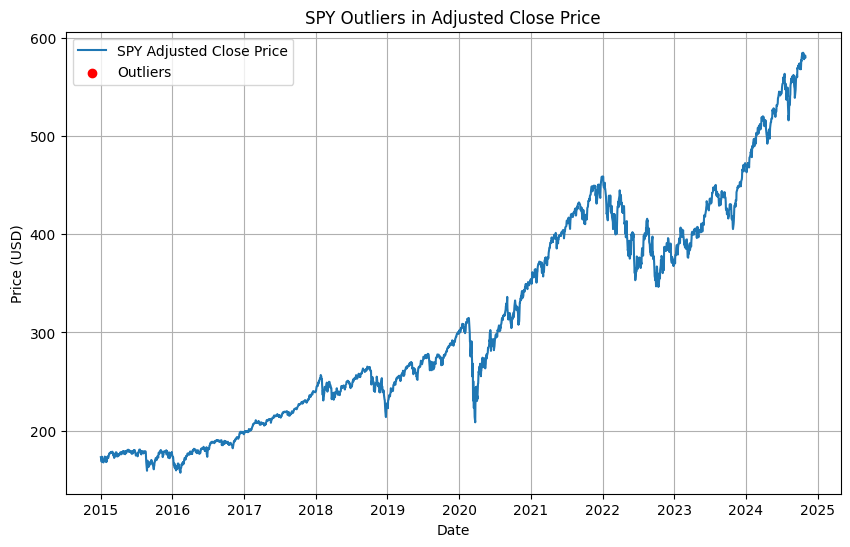

Outliers for SPY:
Empty DataFrame
Columns: [(Adj Close, SPY), (Z-Score, )]
Index: []




In [9]:
detect_outliers(all_data)   

>> ## Unusual High and Low Returns

>>> ### Calculate Daily returns

In [10]:
from scripts.features import *
calc_daily_return(all_data)

2024-11-11 10:33:39.375069: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 10:33:39.378224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-11 10:33:39.387729: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1731310419.404258    9725 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731310419.409419    9725 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-11 10:33:39.425835: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

>>> ### Daily Percentage Change

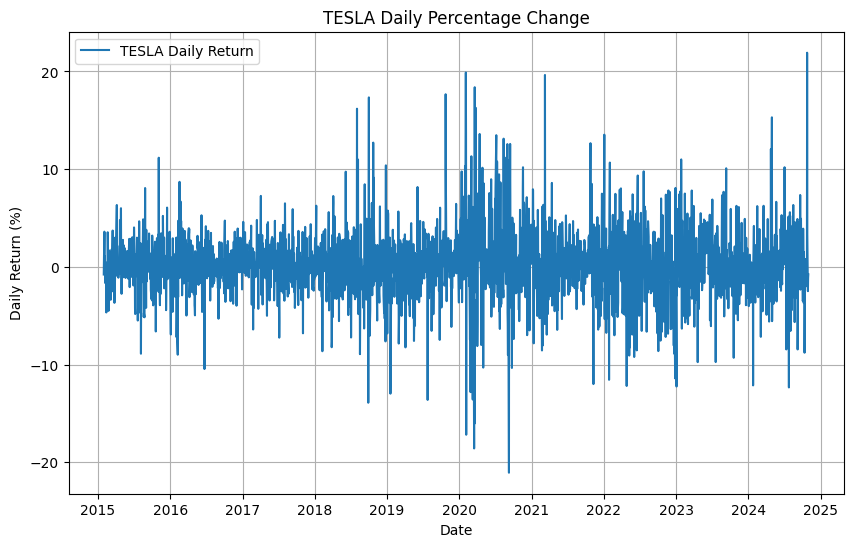

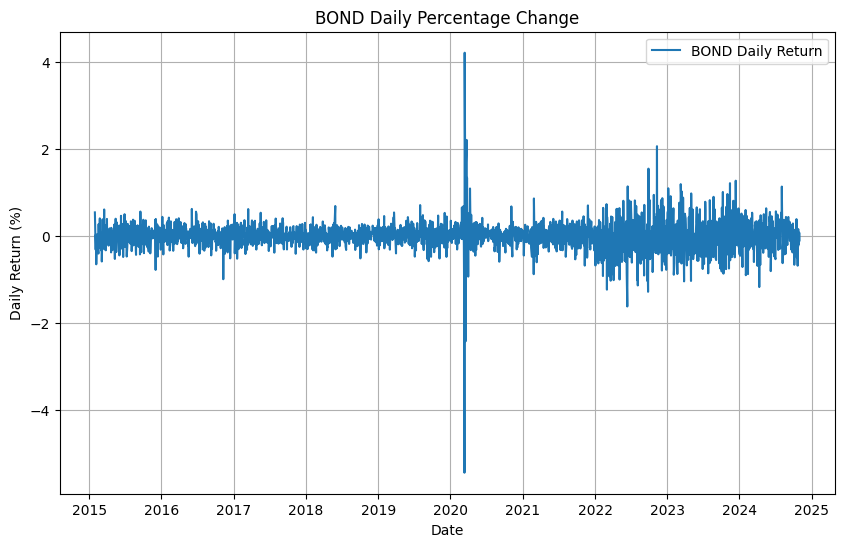

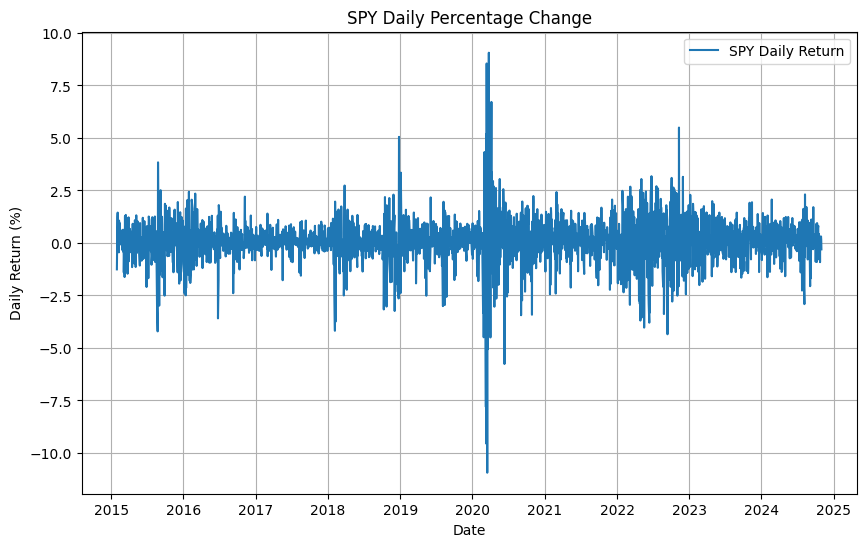

In [11]:
plot_daily_percentage(all_data)

>> ## Unusual High/Low Returns

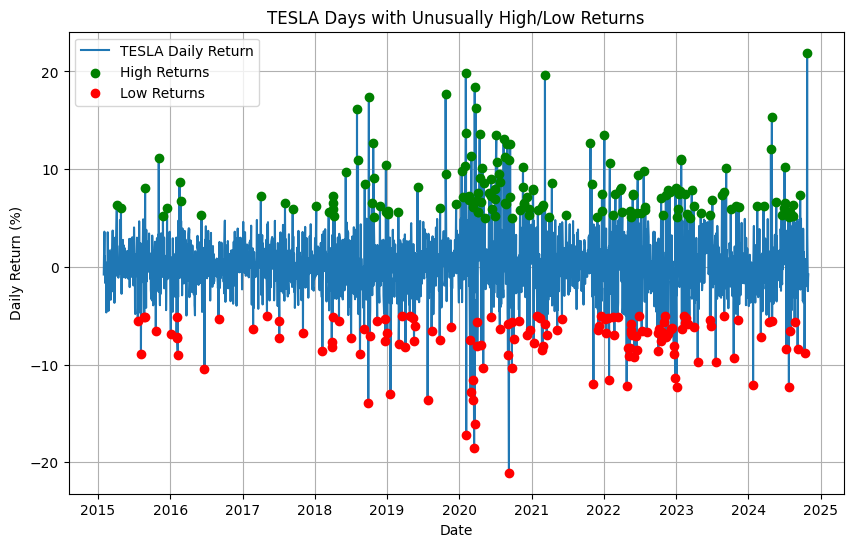

High Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-04-06 00:00:00+00:00     6.335084
2015-04-27 00:00:00+00:00     6.006504
2015-08-27 00:00:00+00:00     8.072407
2015-11-04 00:00:00+00:00    11.173506
2015-11-25 00:00:00+00:00     5.218781
...                                ...
2024-07-29 00:00:00+00:00     5.595998
2024-08-13 00:00:00+00:00     5.235706
2024-08-15 00:00:00+00:00     6.336277
2024-09-19 00:00:00+00:00     7.359156
2024-10-24 00:00:00+00:00    21.919035

[159 rows x 1 columns]


Low Returns for TESLA:
Price                     Daily Return
Ticker                                
Date                                  
2015-07-21 00:00:00+00:00    -5.487851
2015-08-06 00:00:00+00:00    -8.884613
2015-08-20 00:00:00+00:00    -5.120475
2015-08-24 00:00:00+00:00    -5.156654
2015-10-20 00:00:00+00:00    -6.606755
...                                ...
2024-07-24 00:00:00+00:00   -1

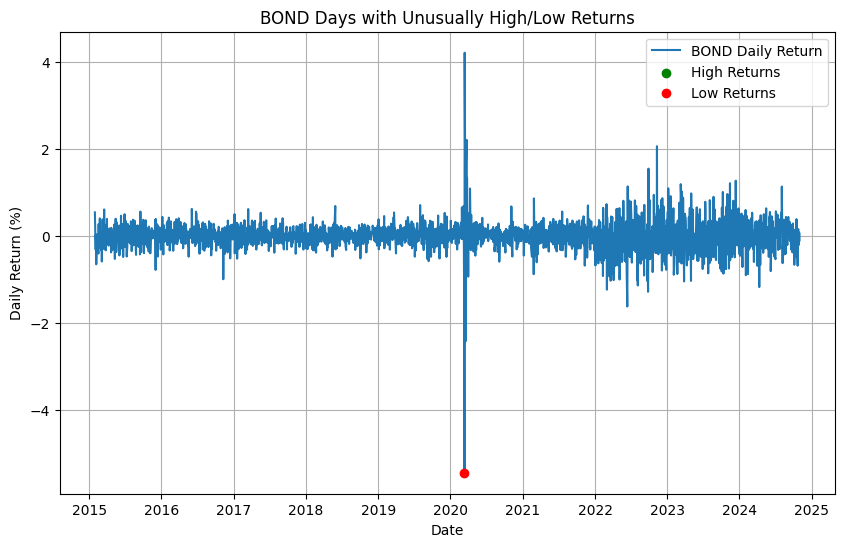

High Returns for BOND:
Empty DataFrame
Columns: [(Daily Return, )]
Index: []


Low Returns for BOND:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-12 00:00:00+00:00    -5.438459




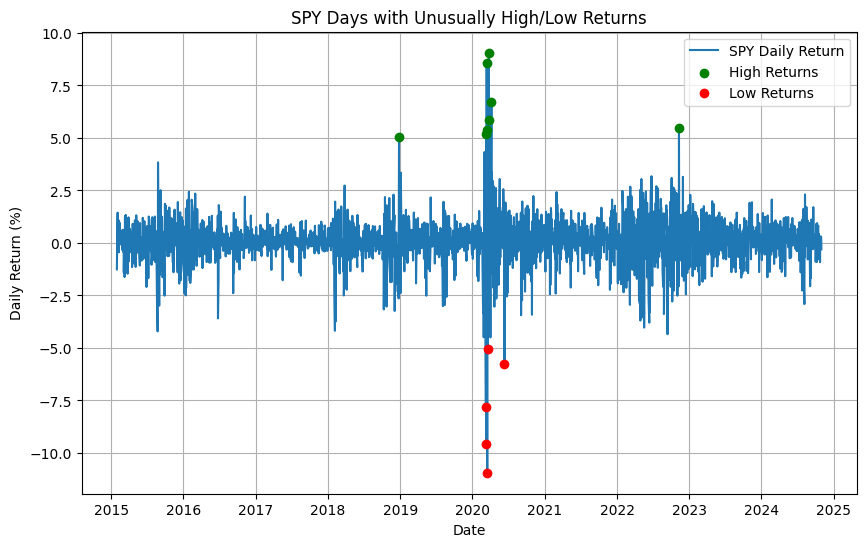

High Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2018-12-26 00:00:00+00:00     5.052490
2020-03-10 00:00:00+00:00     5.174485
2020-03-13 00:00:00+00:00     8.548624
2020-03-17 00:00:00+00:00     5.399224
2020-03-24 00:00:00+00:00     9.060328
2020-03-26 00:00:00+00:00     5.838975
2020-04-06 00:00:00+00:00     6.716638
2022-11-10 00:00:00+00:00     5.495422


Low Returns for SPY:
Price                     Daily Return
Ticker                                
Date                                  
2020-03-09 00:00:00+00:00    -7.809443
2020-03-12 00:00:00+00:00    -9.567728
2020-03-16 00:00:00+00:00   -10.942371
2020-03-18 00:00:00+00:00    -5.063304
2020-06-11 00:00:00+00:00    -5.764920




In [12]:
plot_significant_anomalies(all_data)

>> ## Seasonality and Trends

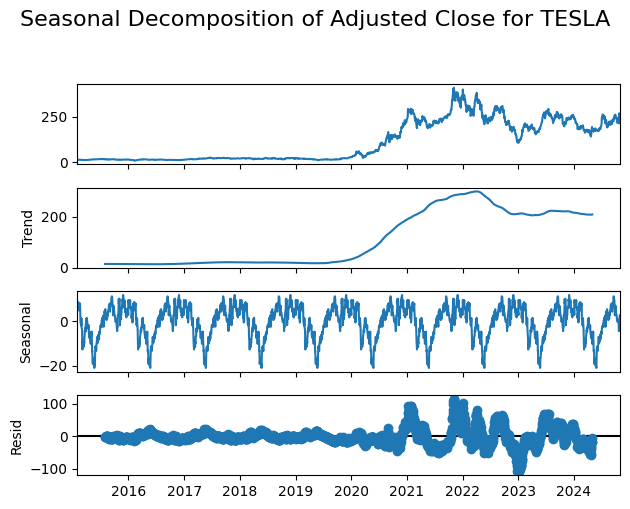

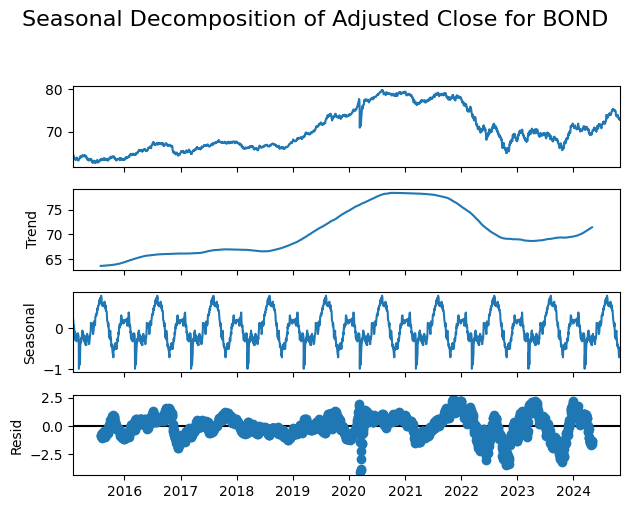

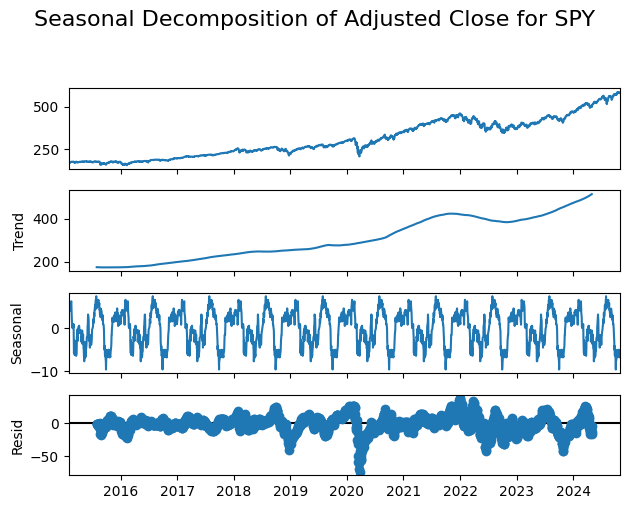

In [13]:
decomposition(all_data)

>> ## Volatility with separate lines for Adjusted Close, Rolling Mean, and Rolling Std Dev

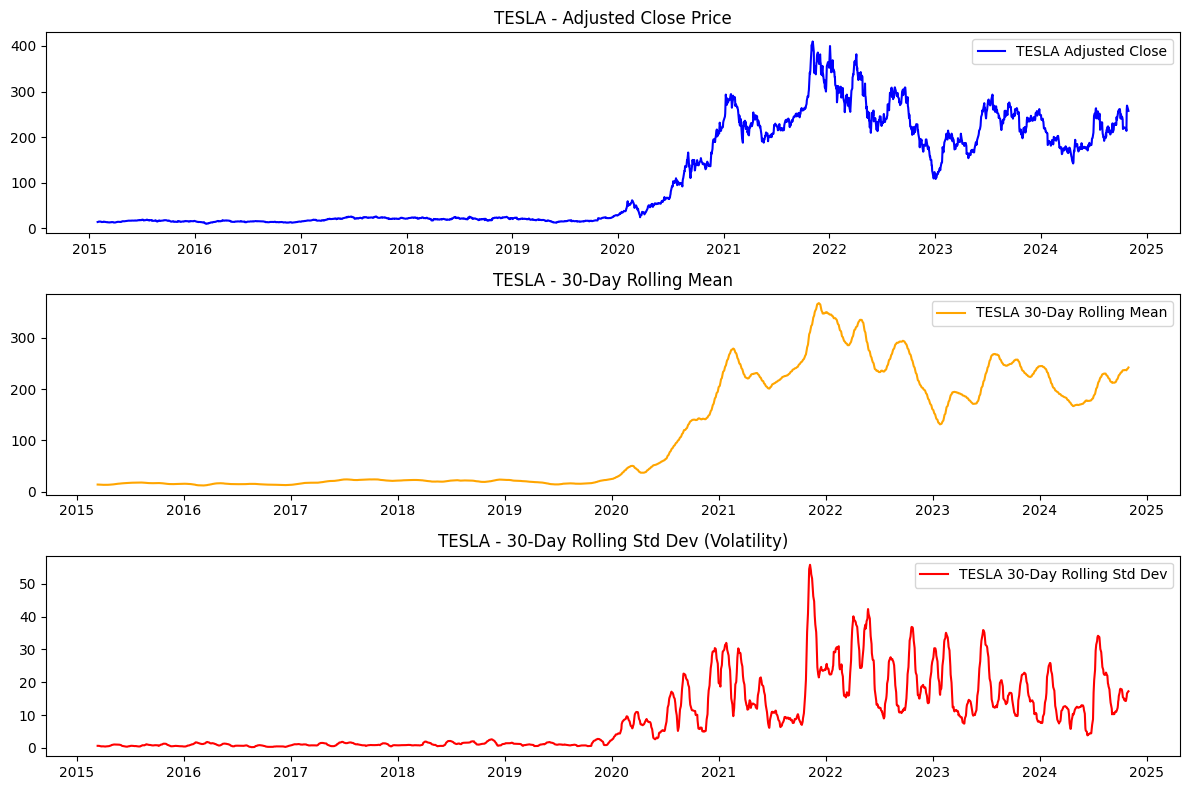

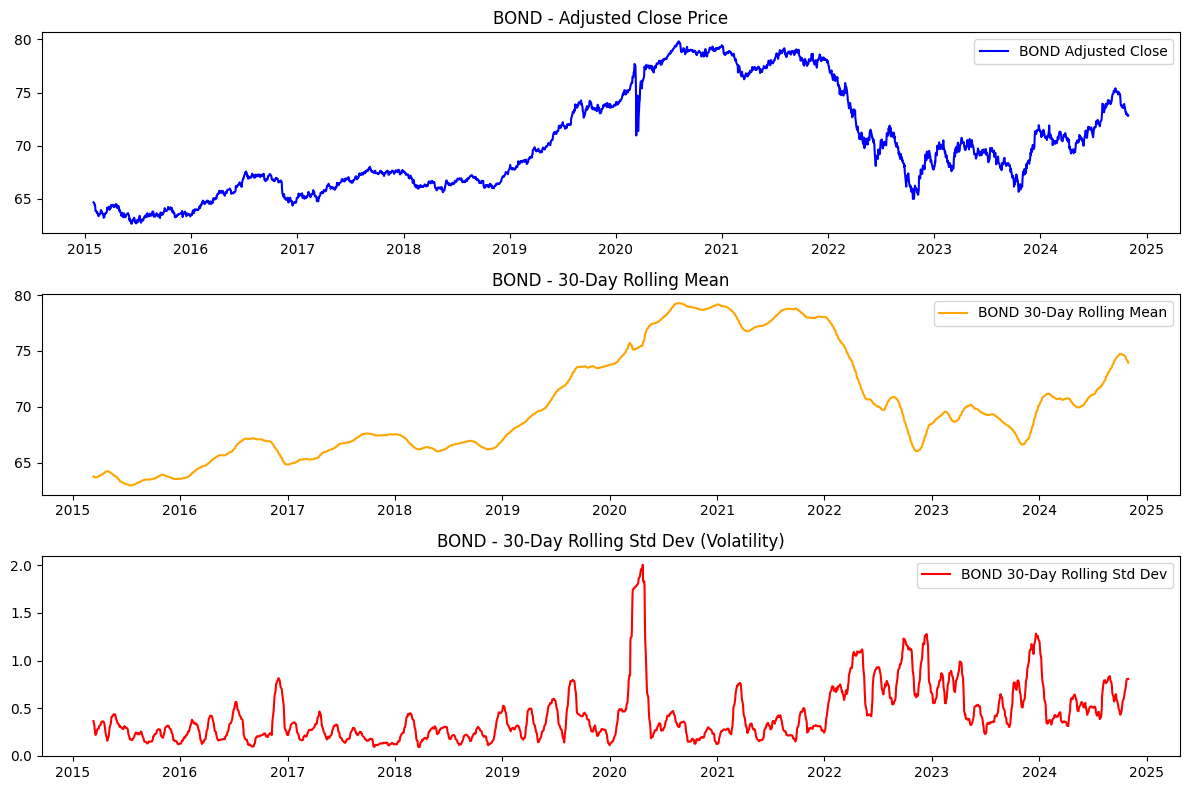

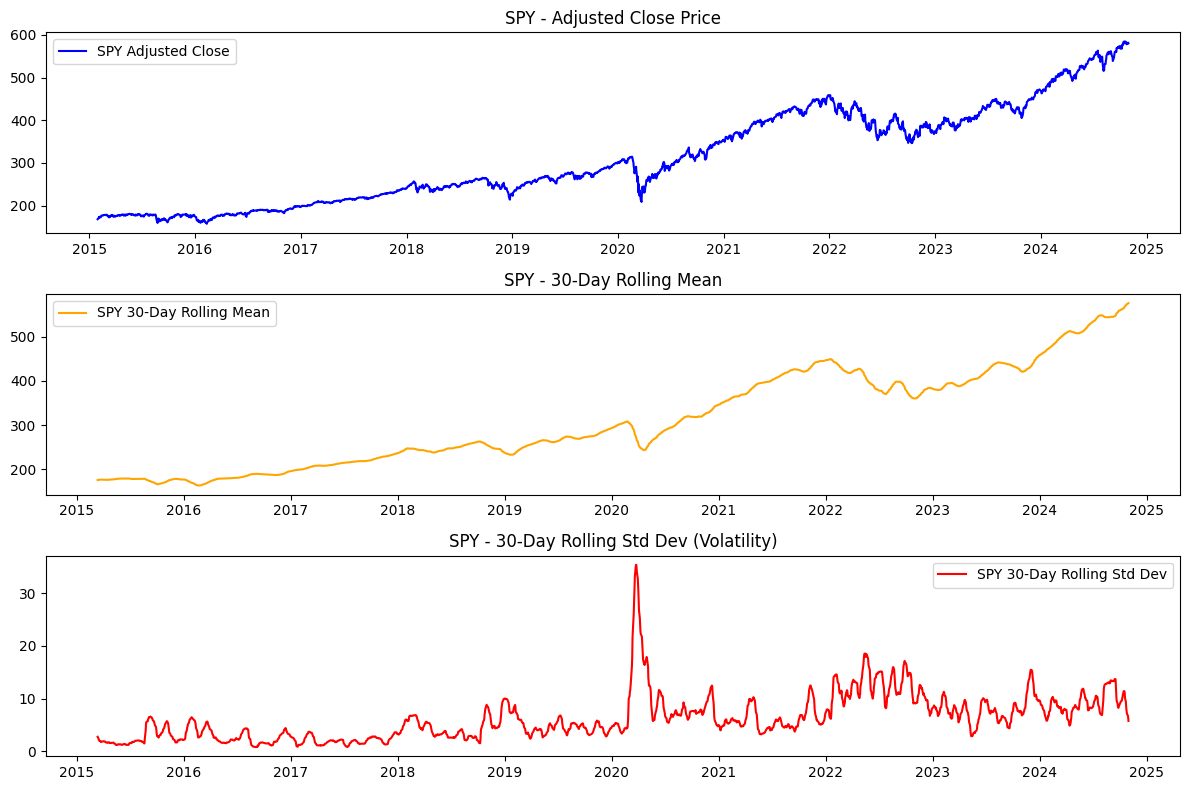

In [14]:
# Define the window size for rolling calculations
window_size = 30  # 30 days

volatility_rolling(window_size,all_data)


>> ## Value At Risk

In [15]:
VaR_values = {}
for asset, data in all_data.items():
    VaR_value = VAR(asset, data)
    if VaR_value is not None: 
        VaR_values[asset] = VaR_value

tesla - 5% Value at Risk (95% confidence): -5.1251
bond - 5% Value at Risk (95% confidence): -0.4801
spy - 5% Value at Risk (95% confidence): -1.6762


In [16]:
print(VaR_values['tesla'])

-5.125142382150489


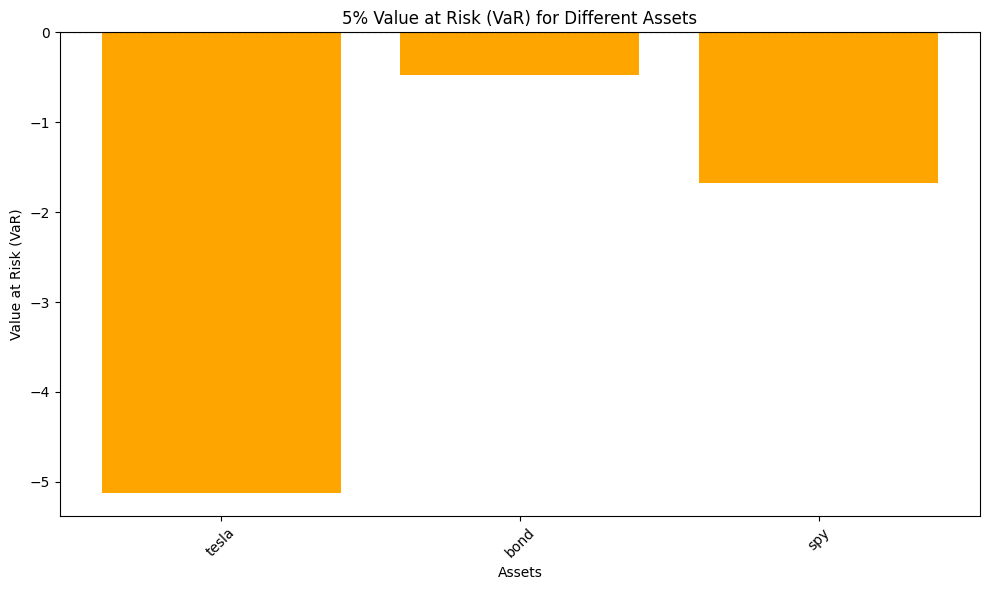

In [17]:
VAR_plot(VaR_values)

>> ## Sharpe Ratio

In [18]:
sharpe_values = {}
for asset, data in all_data.items():
    sharpe_value = Sharpe(asset, data)
    sharpe_values[asset] = sharpe_value

tesla Sharpe Ratio: 0.0512
bond Sharpe Ratio: 0.0162
spy Sharpe Ratio: 0.0504


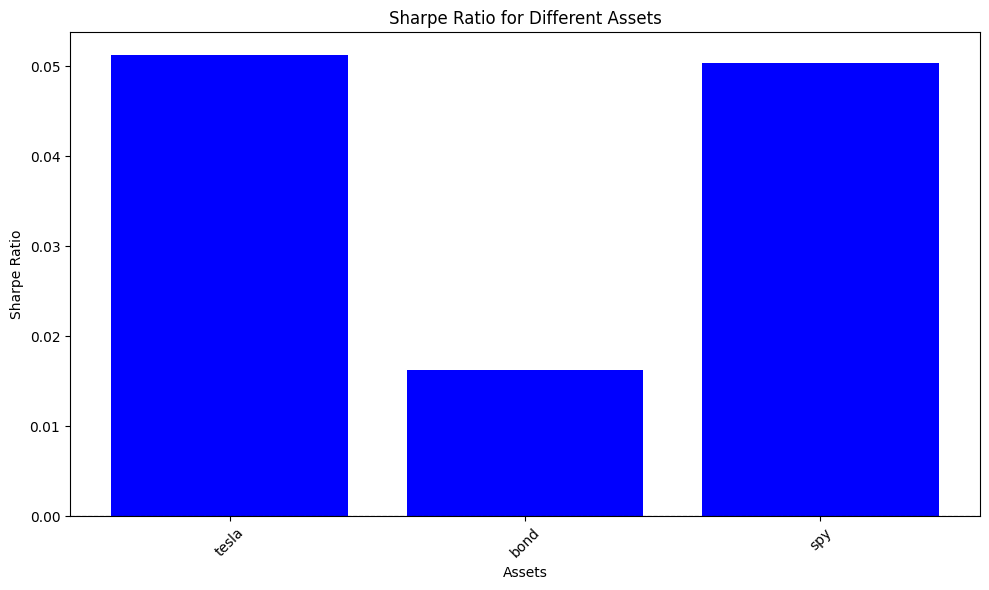

In [19]:
sharpe_plot(sharpe_values)

> # Develop Time Series Forecasting Models

Running forecasting for Tesla (TSLA)...


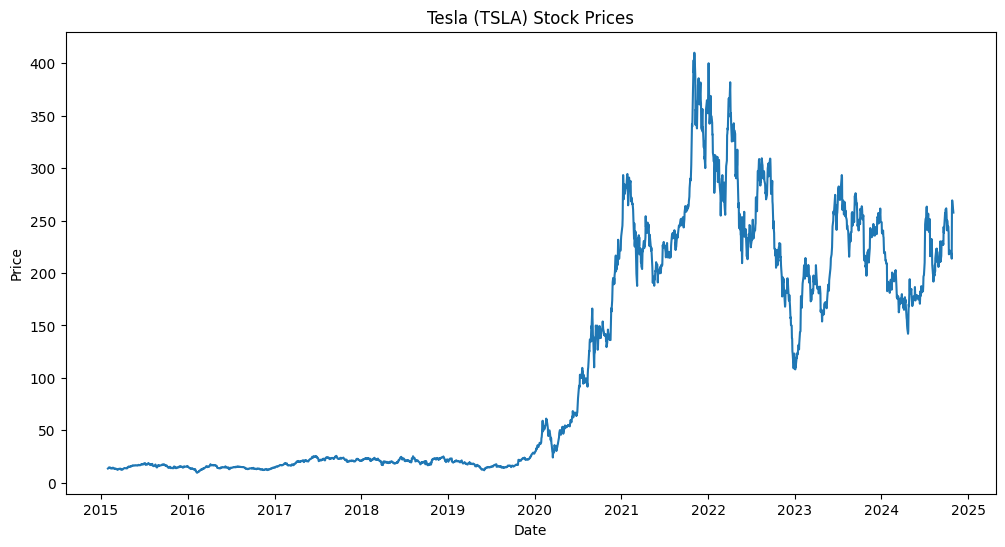

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.18646D+00    |proj g|=  8.09079D-02

At iterate    5    f=  3.12896D+00    |proj g|=  2.23771D-02

At iterate   10    f=  3.11931D+00    |proj g|=  2.64041D-03

At iterate   15    f=  3.11879D+00    |proj g|=  8.75777D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     22      1     0     0   4.978D-06   3.119D+00
  F =   3.1187913239074985     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Epoch 1/

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
2024-11-11 10:33:52.607642: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shap

60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 0.0273
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0011
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 9.6837e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 8.9695e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.6721e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8450e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 7.9404e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7813e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 6.1031e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 5.5377e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Tesla (TSLA) - ARIMA - MAE: 35.16286129421658, RMSE: 43.14955807206825, MAPE: 17.375680462219105
Tesla (TSLA) - SARIMA - MAE: 33.675130153190516, RMSE: 40.02927951858279, MAPE: 19.165270035037405
Tesla (TSLA) - LSTM - MAE: 630.705292087131, RMSE: 635.0668253023703, MAPE: 324.52

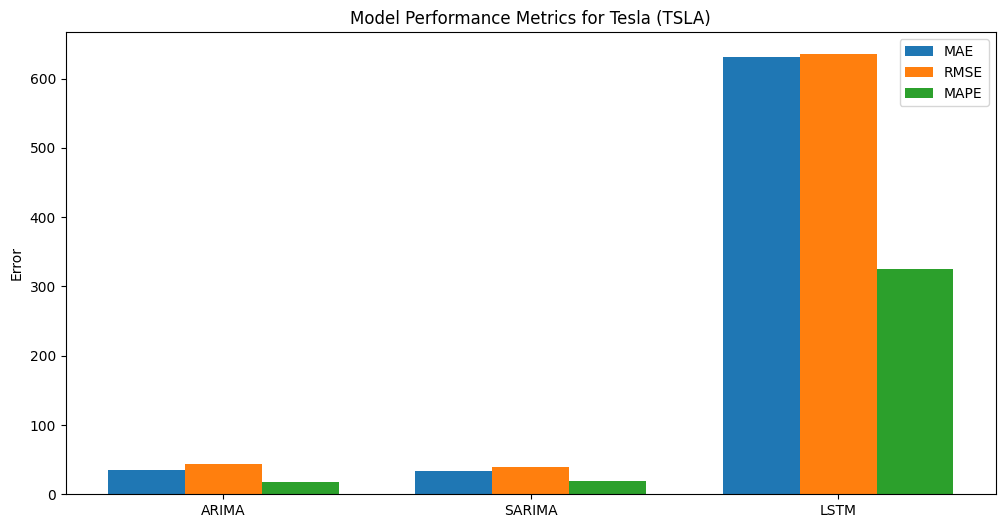

In [20]:
# Run forecasting for Tesla
results_tesla = run_forecasting(all_data['tesla']['Close'], 'Tesla (TSLA)',seasonal_order=(1, 1, 1, 12))


Running forecasting for Vanguard Total Bond Market ETF (BND)...


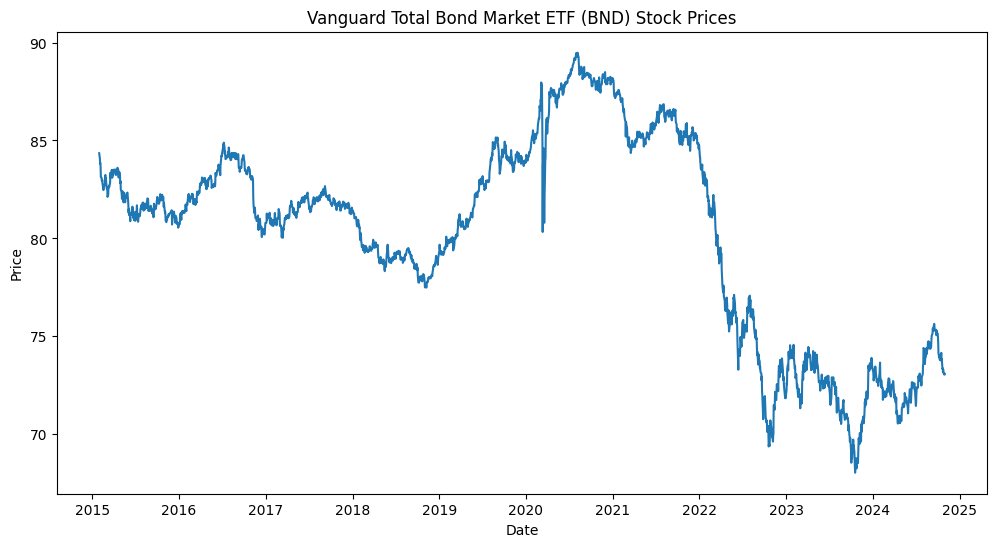

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.34071D-01    |proj g|=  1.17326D+00


 This problem is unconstrained.



At iterate    5    f=  1.52454D-01    |proj g|=  2.51588D-01

At iterate   10    f=  1.15418D-01    |proj g|=  5.06548D-02

At iterate   15    f=  1.00685D-01    |proj g|=  2.05294D-02

At iterate   20    f=  9.74279D-02    |proj g|=  5.20919D-02

At iterate   25    f=  9.55229D-02    |proj g|=  8.96772D-03

At iterate   30    f=  9.54936D-02    |proj g|=  4.54852D-03

At iterate   35    f=  9.53914D-02    |proj g|=  1.17072D-02

At iterate   40    f=  9.53244D-02    |proj g|=  1.38720D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     43     67      1     0     0   1.353D-04   9.532D-02
  F =   9.53242456677


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Epoch 1/10


/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1143
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0015
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 9.5077e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 8.0211e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.6609e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 9.7580e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.7527e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.0841e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.1178e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7264e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Vanguard Total Bond Market ETF (BND) - ARIMA - MAE: 1.1976086912650052, RMSE: 1.4553183453152347, MAPE: 1.6623506612251968
Vanguard Total Bond Market ETF (BND) - SARIMA - MAE: 1.840681015111149, RMSE: 2.079788833920584, MAPE: 2.7007577760944064
Vanguard Total Bond Market ETF (B

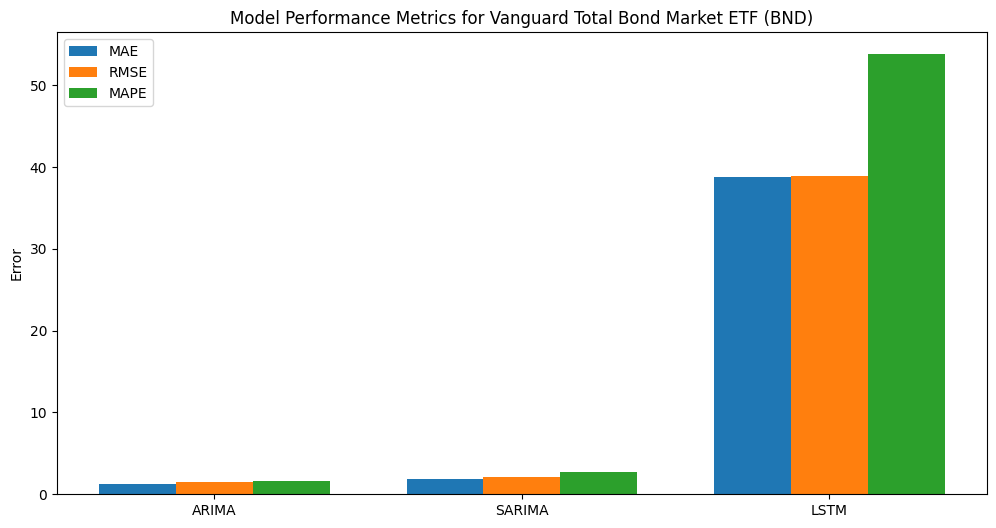

In [21]:
# Run forecasting for Vanguard Total Bond Market ETF
result_bond = run_forecasting(all_data['bond']['Close'], 'Vanguard Total Bond Market ETF (BND)',seasonal_order=(1, 1, 1, 12))

Running forecasting for SPDR S&P 500 ETF Trust (SPY)...


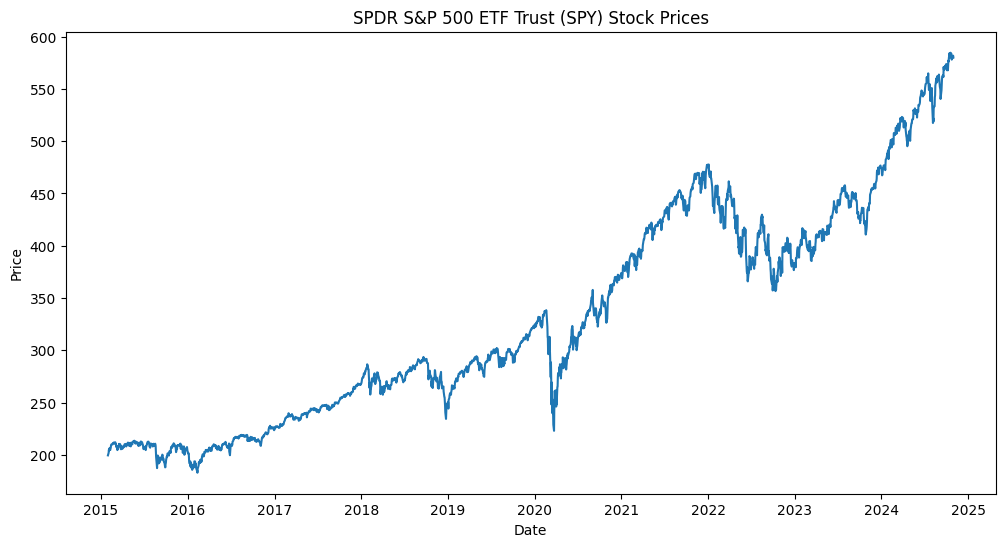

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.83288D+00    |proj g|=  7.93314D-02

At iterate    5    f=  2.72809D+00    |proj g|=  3.46046D-02

At iterate   10    f=  2.70990D+00    |proj g|=  1.02821D-02

At iterate   15    f=  2.70568D+00    |proj g|=  2.06377D-03

At iterate   20    f=  2.70543D+00    |proj g|=  2.60673D-03

At iterate   25    f=  2.70538D+00    |proj g|=  3.42274D-03

At iterate   30    f=  2.69616D+00    |proj g|=  2.68378D-02

At iterate   35    f=  2.68806D+00    |proj g|=  1.94264D-02

At iterate   40    f=  2.68598D+00    |proj g|=  9.81461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/home/amanuel/Documents/Ten-Academy/week11/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


60/60 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0622
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 9.2723e-04
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 8.2905e-04
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.7644e-04
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.6140e-04
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 7.3102e-04
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.5813e-04
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 6.8027e-04
Epoch 9/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 6.5000e-04
Epoch 10/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 5.9874e-04
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
SPDR S&P 500 ETF Trust (SPY) - ARIMA - MAE: 44.735419877952395, RMSE: 57.924030061997904, MAPE: 9.530116396688793
SPDR S&P 500 ETF Trust (SPY) - SARIMA - MAE: 28.152266906061374, RMSE: 38.194349986894366, MAPE: 7.802851002239472
SPDR S&P 500 ETF Trust (SPY) - LSTM - MAE: 18

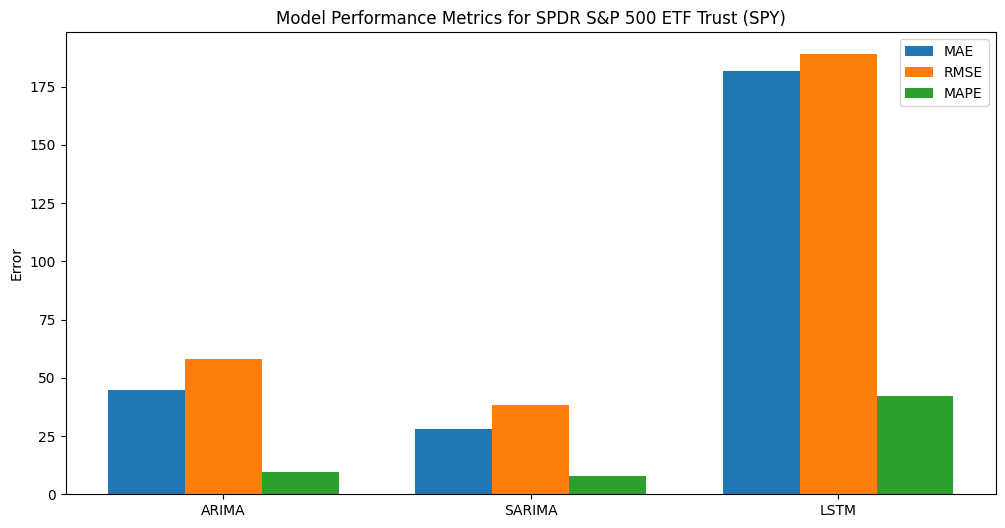

In [22]:
# Run forecasting for SPDR S&P 500 ETF Trust
result_spy = run_forecasting(all_data['spy']['Close'], 'SPDR S&P 500 ETF Trust (SPY)',seasonal_order=(1, 1, 1, 12))

> # Forecast Future Market Trends

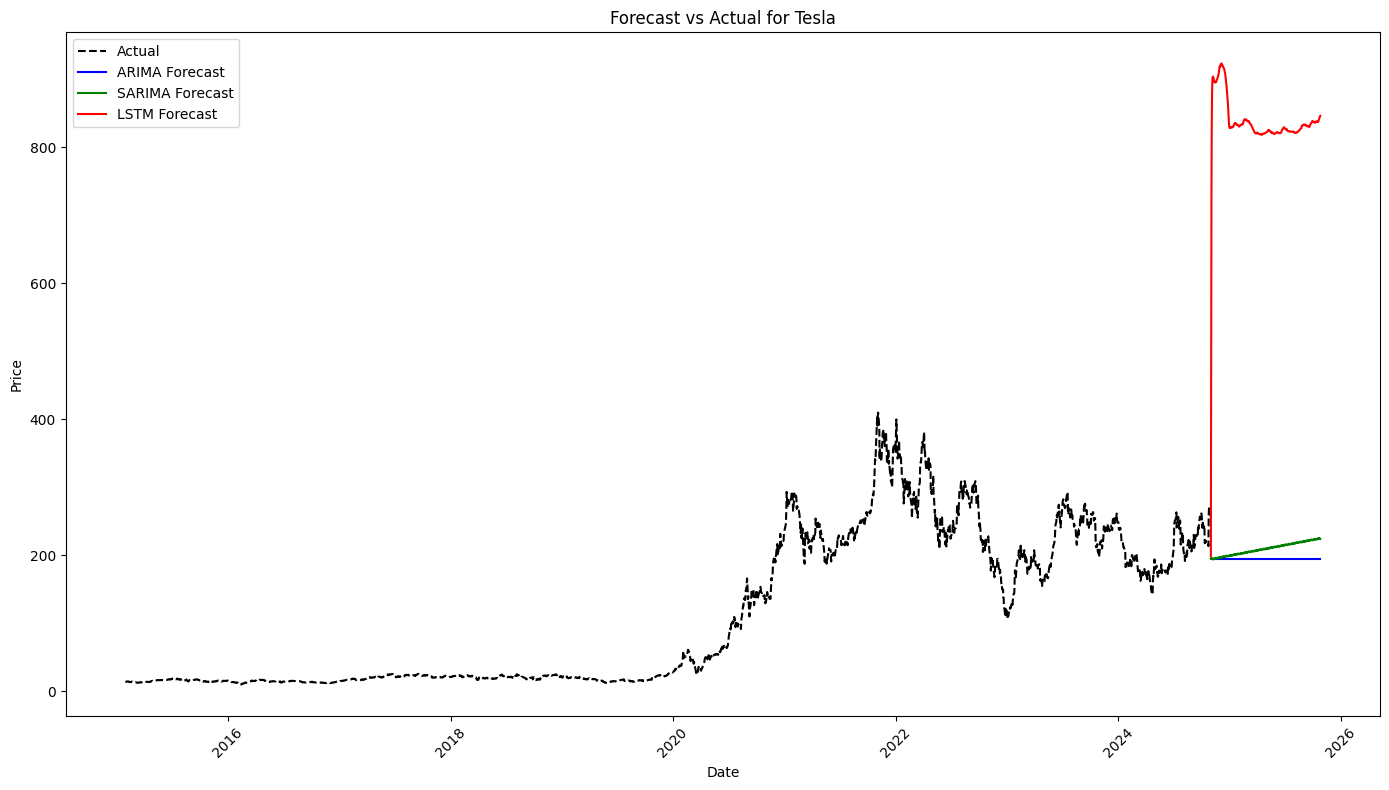


Summary of Model Performance for Tesla:
ARIMA - MAE: 35.1629, RMSE: 43.1496, MAPE: 17.38%
SARIMA - MAE: 33.6751, RMSE: 40.0293, MAPE: 19.17%
LSTM - MAE: 630.7053, RMSE: 635.0668, MAPE: 324.53%

Best Model for Tesla based on MAPE: ARIMA



In [61]:
forecast(all_data['tesla'], results_tesla,'Tesla')

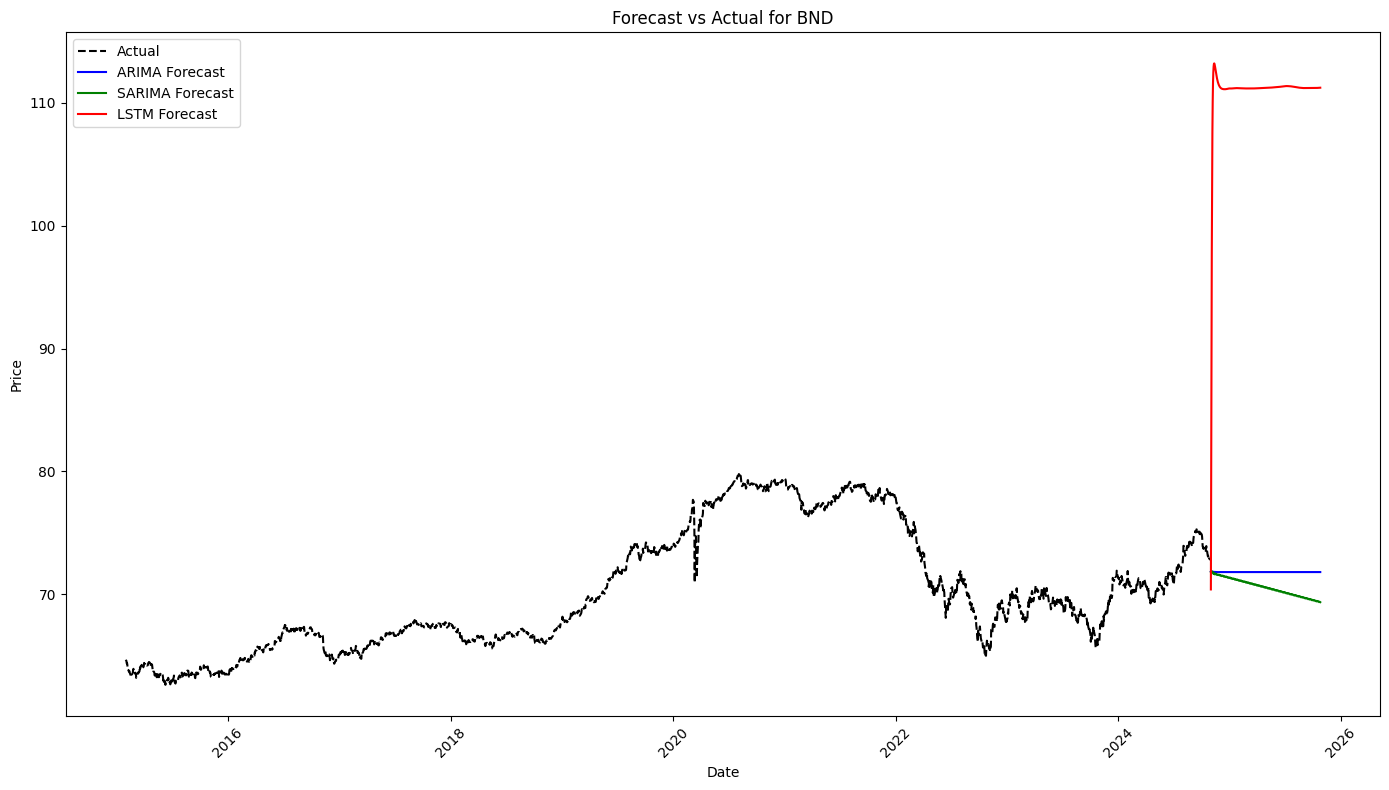


Summary of Model Performance for BND:
ARIMA - MAE: 1.1976, RMSE: 1.4553, MAPE: 1.66%
SARIMA - MAE: 1.8407, RMSE: 2.0798, MAPE: 2.70%
LSTM - MAE: 38.7733, RMSE: 38.9080, MAPE: 53.77%

Best Model for BND based on MAPE: ARIMA



In [ ]:

forecast(all_data['bond'], result_bond,'BND')

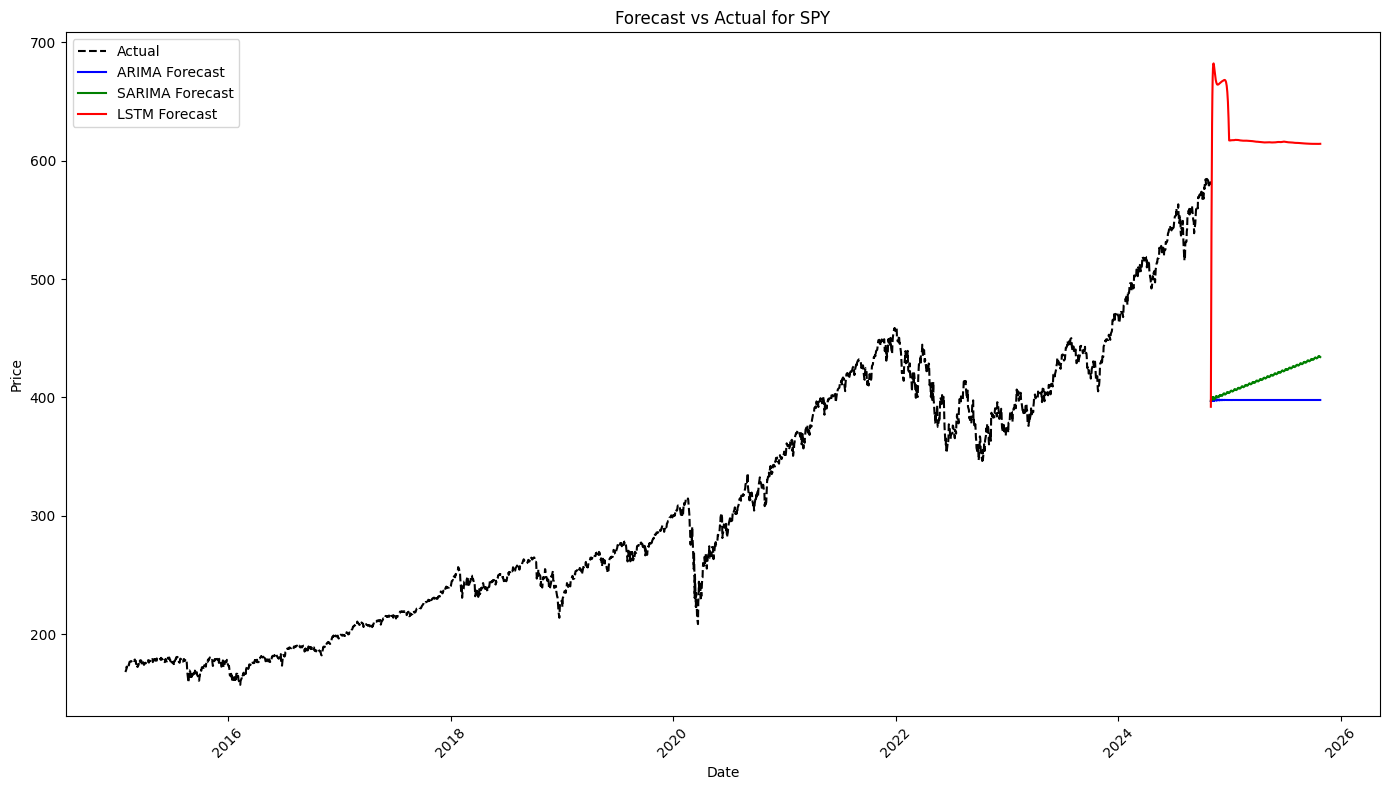


Summary of Model Performance for SPY:
ARIMA - MAE: 44.7354, RMSE: 57.9240, MAPE: 9.53%
SARIMA - MAE: 28.1523, RMSE: 38.1943, MAPE: 7.80%
LSTM - MAE: 181.5304, RMSE: 188.8768, MAPE: 42.36%

Best Model for SPY based on MAPE: SARIMA



In [43]:
forecast(all_data['spy'], result_spy,'SPY')

> # Optimizing Portfolio Based on Forecast

In [93]:
all_data['tesla']=all_data['tesla'].reset_index()
all_data['bond']=all_data['bond'].reset_index()
all_data['spy']=all_data['spy'].reset_index()

In [94]:
# Rename the 'Close' columns to the respective asset names
tsla_df = all_data['tesla'].rename(columns={'Close': 'TSLA'})
bnd_df = all_data['bond'].rename(columns={'Close': 'BND'})
spy_df = all_data['spy'].rename(columns={'Close': 'SPY'})

# Merge the DataFrames on 'Date'
df = tsla_df[['Date', 'TSLA']].merge(bnd_df[['Date', 'BND']], on='Date', how='outer')
df = df.merge(spy_df[['Date', 'SPY']], on='Date', how='outer')

# Sort by Date if needed
df = df.sort_values('Date').reset_index(drop=True)


/tmp/ipykernel_9725/2124679718.py:7: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = tsla_df[['Date', 'TSLA']].merge(bnd_df[['Date', 'BND']], on='Date', how='outer')


In [95]:
# Calculate daily returns for each asset
df['TSLA_daily_return'] = df['TSLA'].pct_change()
df['BND_daily_return'] = df['BND'].pct_change()
df['SPY_daily_return'] = df['SPY'].pct_change()

# Calculate the average daily return for each asset
avg_daily_return_tsla = df['TSLA_daily_return'].mean()
avg_daily_return_bnd = df['BND_daily_return'].mean()
avg_daily_return_spy = df['SPY_daily_return'].mean()

# Compound the average daily returns to annualize them
trading_days_per_year = 252  # Typically 252 trading days in a year

annual_return_tsla = (1 + avg_daily_return_tsla) ** trading_days_per_year - 1
annual_return_bnd = (1 + avg_daily_return_bnd) ** trading_days_per_year - 1
annual_return_spy = (1 + avg_daily_return_spy) ** trading_days_per_year - 1

# Display the annual returns
annual_returns = {
    'TSLA': annual_return_tsla,
    'BND': annual_return_bnd,
    'SPY': annual_return_spy
}
annual_returns

{'TSLA': 0.5897238492611216,
 'BND': -0.013152496790022616,
 'SPY': 0.13365124614813606}

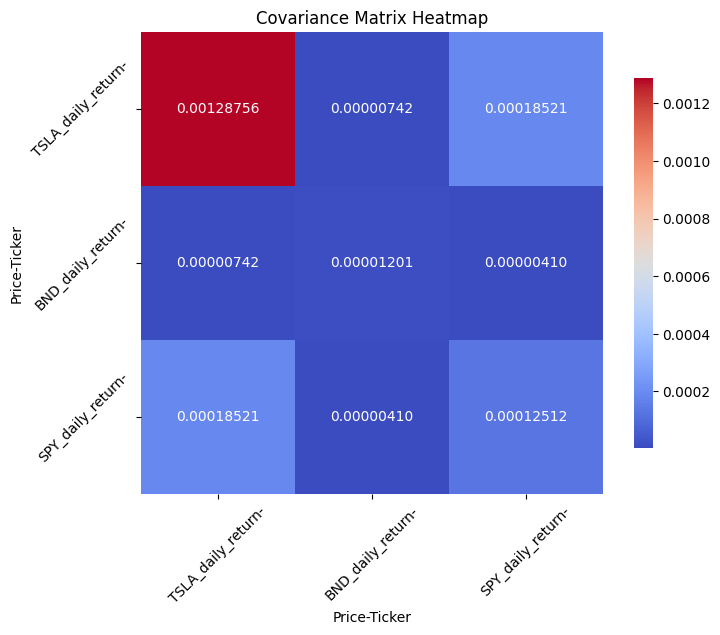

In [97]:
import seaborn as sns
daily_returns = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']]

# Calculate the covariance matrix
cov_matrix = daily_returns.cov()


plt.figure(figsize=(8, 6))
sns.heatmap(cov_matrix, annot=True, fmt=".8f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Covariance Matrix Heatmap')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [103]:
weights = [0.5, 0.3, 0.2]
weighted_daily_return = (weights[0] * df['TSLA_daily_return'] + 
                         weights[1] * df['BND_daily_return'] + 
                         weights[2] * df['SPY_daily_return'])

# Calculate annualized portfolio return (assuming 252 trading days in a year)
portfolio_annual_return = (1 + weighted_daily_return.mean())**252 - 1
portfolio_annual_return

0.2878698648380795

In [ ]:
import scipy.optimize as sco

expected_returns = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].mean()
cov_matrix = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].cov()

# Define the objective function to minimize (negative Sharpe Ratio)
def negative_sharpe(weights):
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Maximizing Sharpe Ratio

# Constraints and bounds for optimization
constraints = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}  # Weights sum to 1
bounds = tuple((0, 1) for _ in range(len(expected_returns)))  # Weights between 0 and 1

# Initial guess for weights
initial_weights = [1 / len(expected_returns)] * len(expected_returns)

# Optimize weights
optimized = sco.minimize(negative_sharpe, initial_weights, constraints=constraints, bounds=bounds)
optimal_weights = optimized.x

# Calculate the weighted daily return using the optimized weights
weighted_daily_return = (optimal_weights[0] * df['TSLA_daily_return'] + 
                         optimal_weights[1] * df['BND_daily_return'] + 
                         optimal_weights[2] * df['SPY_daily_return'])

# Calculate annualized portfolio return (assuming 252 trading days in a year)
portfolio_annual_return = (1 + weighted_daily_return.mean())**252 - 1

# Display optimized weights and annual return
optimal_weights, portfolio_annual_return

(array([3.14676924e-01, 1.40946282e-17, 6.85323076e-01]), 0.26098109611995457)

In [102]:
portfolio_variance = np.dot(optimal_weights, np.dot(cov_matrix, optimal_weights))

# Calculate portfolio volatility (standard deviation)
portfolio_volatility = np.sqrt(portfolio_variance) * np.sqrt(252)  # Annualize volatility

portfolio_volatility

0.25897602692813637

In [112]:
df['TSLA_daily_return'] = df['TSLA_daily_return'].fillna(df['TSLA_daily_return'].mean())
df['TSLA_daily_return'].isna().sum()

0

In [113]:
import numpy as np
import scipy.stats as stats

# Drop missing values
df['TSLA_daily_return'].dropna(inplace=True)

average_portfolio_return = weighted_daily_return.mean()

# 2. Measure the standard deviation of portfolio returns to understand volatility
portfolio_volatility = weighted_daily_return.std()

# 3. Measure the potential loss in value of Tesla stock at a given confidence interval (Value at Risk - VaR)
# Assuming `df['TSLA_daily_return']` contains Tesla's daily returns
try:
    # Historical VaR approach (using the 5th percentile for 95% confidence)
    confidence_level = 0.95
    var_Tesla = np.percentile(df['TSLA_daily_return'], (1 - confidence_level) * 100)
except Exception as e:
    # Fallback in case of errors (e.g., if not enough data)
    var_Tesla = df['TSLA_daily_return'].mean() 

# Alternatively, using the parametric VaR approach (assuming returns are normally distributed)
try:
    mean_Tesla_return = df['TSLA_daily_return'].mean()
    std_Tesla_return = df['TSLA_daily_return'].std()
    var_Tesla_parametric = stats.norm.ppf(1 - confidence_level) * std_Tesla_return + mean_Tesla_return
except Exception as e:
    var_Tesla_parametric = df['TSLA_daily_return'].mean()  # Fallback to mean return

# 4. Calculate the Sharpe Ratio for the portfolio (assuming a risk-free rate of 0 for simplicity)
sharpe_ratio = average_portfolio_return / portfolio_volatility

# Annualize the average return and volatility if needed (assuming 252 trading days per year)
annualized_portfolio_return = (1 + average_portfolio_return)**252 - 1
annualized_portfolio_volatility = portfolio_volatility * np.sqrt(252)
annualized_sharpe_ratio = annualized_portfolio_return / annualized_portfolio_volatility

# Display the results
results = {
    "Average Portfolio Return (Daily)": average_portfolio_return,
    "Portfolio Volatility (Daily)": portfolio_volatility,
    "Tesla VaR (95% confidence)": var_Tesla,
    "Tesla VaR (Parametric 95% confidence)": var_Tesla_parametric,
    "Sharpe Ratio (Daily)": sharpe_ratio,
    "Annualized Portfolio Return": annualized_portfolio_return,
    "Annualized Portfolio Volatility": annualized_portfolio_volatility,
    "Annualized Sharpe Ratio": annualized_sharpe_ratio
}

results


/tmp/ipykernel_9725/1207307345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TSLA_daily_return'].dropna(inplace=True)


{'Average Portfolio Return (Daily)': 0.0009206221860628,
 'Portfolio Volatility (Daily)': 0.01631395625665275,
 'Tesla VaR (95% confidence)': -0.05125142382150489,
 'Tesla VaR (Parametric 95% confidence)': -0.05716837563049408,
 'Sharpe Ratio (Daily)': 0.05643157132331864,
 'Annualized Portfolio Return': 0.26098109611995457,
 'Annualized Portfolio Volatility': 0.25897602692813637,
 'Annualized Sharpe Ratio': 1.0077422965191083}

In [114]:
mean_returns = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].mean()

# Calculate the covariance matrix of returns
cov_matrix = df[['TSLA_daily_return', 'BND_daily_return', 'SPY_daily_return']].cov()

# Define the number of assets
num_assets = len(mean_returns)

# Function to calculate portfolio performance (return, volatility)
def portfolio_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns * weights)  # Portfolio return
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))  # Portfolio volatility
    return returns, volatility

# Objective function: Minimize the negative Sharpe ratio
def negative_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate=0):
    portfolio_return, portfolio_volatility = portfolio_performance(weights, mean_returns, cov_matrix)
    return -(portfolio_return - risk_free_rate) / portfolio_volatility

# Constraints: Weights must sum to 1 (full investment)
def weight_constraint(weights):
    return np.sum(weights) - 1

# Initial guess (equal distribution of weights)
initial_guess = np.array([1/num_assets] * num_assets)

# Bounds for each weight: between 0 and 1
bounds = tuple((0, 1) for asset in range(num_assets))

# Constraints: weights must sum to 1
constraints = ({'type': 'eq', 'fun': weight_constraint})

# Perform the optimization to maximize the Sharpe ratio
optimized_result = sco.minimize(negative_sharpe_ratio, initial_guess, args=(mean_returns, cov_matrix),
                                method='SLSQP', bounds=bounds, constraints=constraints)

# Extract the optimized weights
optimized_weights = optimized_result.x

# Calculate the optimized portfolio performance
optimized_return, optimized_volatility = portfolio_performance(optimized_weights, mean_returns, cov_matrix)

# Annualize the optimized return and volatility
annualized_optimized_return = (1 + optimized_return) ** 252 - 1  # Assuming 252 trading days per year
annualized_optimized_volatility = optimized_volatility * np.sqrt(252)

# Sharpe ratio for the optimized portfolio
optimized_sharpe_ratio = annualized_optimized_return / annualized_optimized_volatility

# Display results
optimized_results = {
    "Optimized Portfolio Weights (TSLA, BND, SPY)": optimized_weights,
    "Optimized Portfolio Return (Annualized)": annualized_optimized_return,
    "Optimized Portfolio Volatility (Annualized)": annualized_optimized_volatility,
    "Optimized Sharpe Ratio": optimized_sharpe_ratio
}

optimized_results

{'Optimized Portfolio Weights (TSLA, BND, SPY)': array([0.31486875, 0.        , 0.68513125]),
 'Optimized Portfolio Return (Annualized)': 0.26106290684656175,
 'Optimized Portfolio Volatility (Annualized)': 0.2590231697509516,
 'Optimized Sharpe Ratio': 1.0078747283402152}

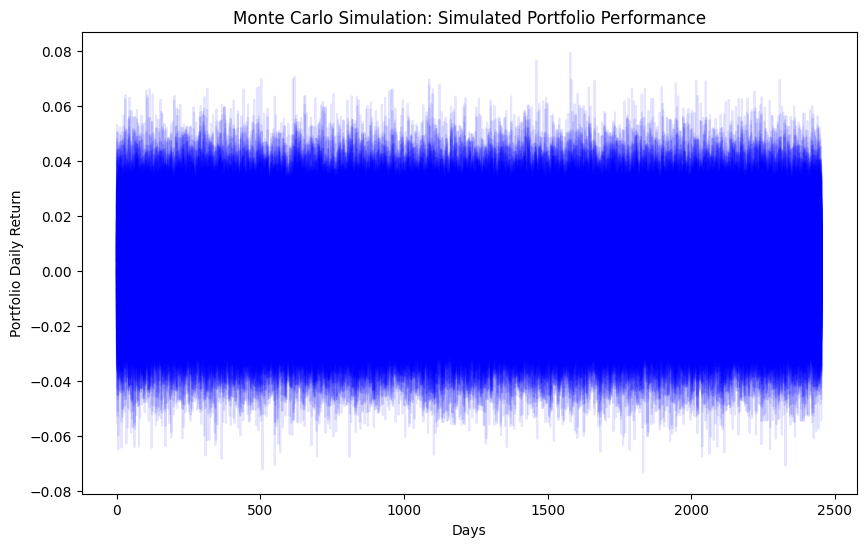

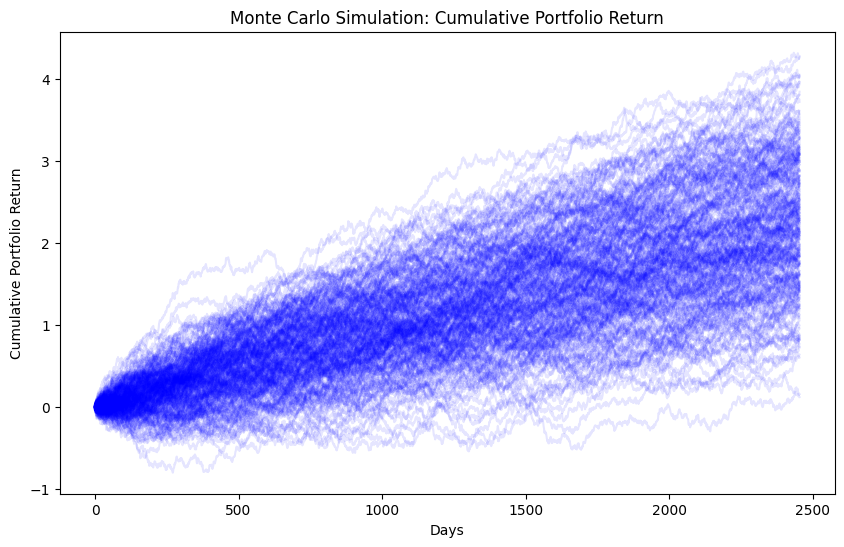

In [116]:
dataset_size = len(df)  # Number of rows (days) in your dataset
num_days = len(df)  # The number of data points (days) in the dataset

# Adjust number of simulations based on dataset size
# E.g., 100 simulations for every 100 days in the dataset (you can adjust the multiplier as needed)
num_simulations = min(1000, int(dataset_size / 10))

simulated_portfolios = np.zeros((num_simulations, num_days))

for i in range(num_simulations):
    # Generate random returns for each asset (TSLA, BND, SPY)
    random_returns = np.random.multivariate_normal(mean_returns, cov_matrix, num_days)
    
    # Calculate the portfolio returns for each day (weighted sum of returns)
    simulated_portfolios[i] = np.dot(random_returns, optimized_weights)

# Plot the simulated portfolio returns
plt.figure(figsize=(10, 6))
plt.plot(simulated_portfolios.T, color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation: Simulated Portfolio Performance')
plt.xlabel('Days')
plt.ylabel('Portfolio Daily Return')
plt.show()

# Calculate the cumulative return for each simulation to see the total portfolio growth over time
cumulative_returns = np.cumsum(simulated_portfolios, axis=1)

# Plot the cumulative returns to visualize portfolio growth over time
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.T, color='blue', alpha=0.1)
plt.title('Monte Carlo Simulation: Cumulative Portfolio Return')
plt.xlabel('Days')
plt.ylabel('Cumulative Portfolio Return')
plt.show()

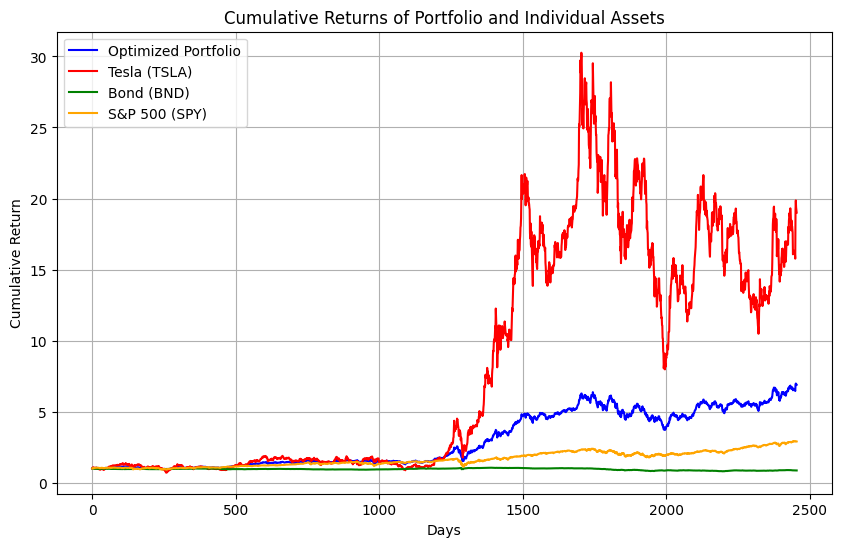

In [117]:
cumulative_returns = (1 + weighted_daily_return).cumprod()
cumulative_returns_TESLA = (1 + df['TSLA_daily_return']).cumprod()
cumulative_returns_BND = (1 + df['BND_daily_return']).cumprod()
cumulative_returns_SPY = (1 + df['SPY_daily_return']).cumprod()

# Plot cumulative returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label="Optimized Portfolio", color='blue')
plt.plot(cumulative_returns_TESLA, label="Tesla (TSLA)", color='red')
plt.plot(cumulative_returns_BND, label="Bond (BND)", color='green')
plt.plot(cumulative_returns_SPY, label="S&P 500 (SPY)", color='orange')

plt.title("Cumulative Returns of Portfolio and Individual Assets")
plt.xlabel("Days")
plt.ylabel("Cumulative Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

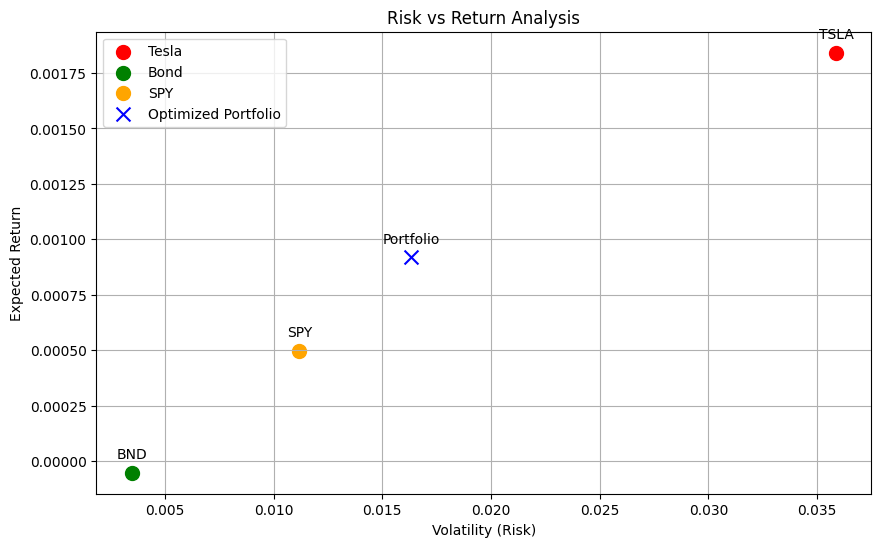

In [122]:
# Plot Risk vs Return for the assets and portfolio
returns = [mean_returns['TSLA_daily_return'], mean_returns['BND_daily_return'], mean_returns['SPY_daily_return'], average_portfolio_return]
volatility = [df['TSLA_daily_return'].std(), df['BND_daily_return'].std(), df['SPY_daily_return'].std(), portfolio_volatility]

plt.figure(figsize=(10, 6))

# Scatter plot for individual assets with separate colors and labels
plt.scatter(volatility[0], returns[0], color='red', label='Tesla', s=100)
plt.scatter(volatility[1], returns[1], color='green', label='Bond', s=100)
plt.scatter(volatility[2], returns[2], color='orange', label='SPY', s=100)

# Scatter plot for the optimized portfolio
plt.scatter(portfolio_volatility, average_portfolio_return, color='blue', label="Optimized Portfolio", marker='x', s=100)

# Add labels and legend
for i, txt in enumerate(['TSLA', 'BND', 'SPY', 'Portfolio']):
    plt.annotate(txt, (volatility[i], returns[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.title("Risk vs Return Analysis")
plt.xlabel("Volatility (Risk)")
plt.ylabel("Expected Return")
plt.legend()
plt.grid(True)
plt.show()